## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, we will further investigate some comparisons between our personal logistic regression implementation, that of sci-kit learn and further tuning parameters that can be adjusted in the model.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, we were able to recreat a logistic regression model output from sci-kit learn that did not include an intercept of regularization. Here, you will continue to analyze the impact of several tuning parameters including the intercept, and regularization parameter which we have not discussed previously.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

/opt/conda/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/opt/conda/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implementk a standard train-test split.  
**For consistency of results, use random_state=17.**

In [3]:
np.random.seed(17)

In [4]:
X = df.drop('target', axis=1)
y = df['target']

## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

## Now use your algorithm to make [probability] predictions on the test set

In [8]:
probs = logreg.predict_proba(X_test)

## Create an ROC curve for your predictions

In [9]:
from sklearn.metrics import roc_curve, auc

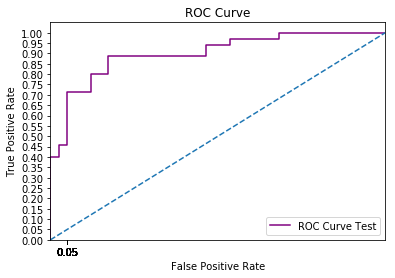

In [12]:
y_score = logreg.decision_function(X_test)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_score)

plt.plot(fpr_test, tpr_test, label='ROC Curve Test', color='purple')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([1/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

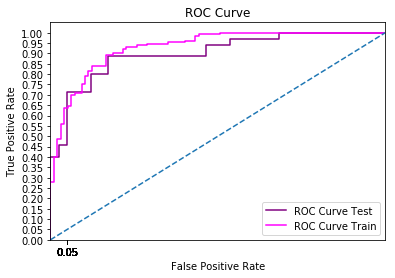

In [13]:
y_score_train = logreg.decision_function(X_train)

fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_score_train)

plt.plot(fpr_test, tpr_test, label='ROC Curve Test', color='purple')
plt.plot(fpr_train, tpr_train, label='ROC Curve Train', color='magenta')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([1/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

In [23]:
import itertools

def binary_prediction(probabilities, threshold=.5):
    classes = []
    for p in probabilities:
        if p >= threshold:
            classes.append(1)
        else:
            classes.append(0)
    return classes

test_predictions = binary_prediction(y_score)

In [15]:
from sklearn.metrics import confusion_matrix

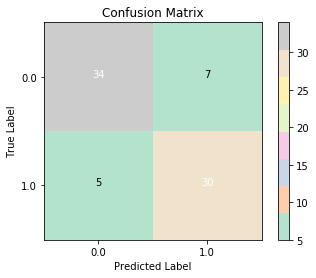

In [27]:
cf = confusion_matrix(y_test, test_predictions)

plt.imshow(cf, cmap=plt.cm.Pastel2)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

classes = y.unique()
class_names = set(classes)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

thresh = cf.max() / 2
for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j,i, cf[i,j], horizontalalignment='center', color='w' if cf[i,j] > thresh else 'black')
plt.colorbar()

## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [ ]:
# Your code here

## Create an ROC Curve for the sci-kit learn model

In [ ]:
#Your code here

## As before add an ROC curve to the graph for the train set as well

In [ ]:
#Your code here

## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

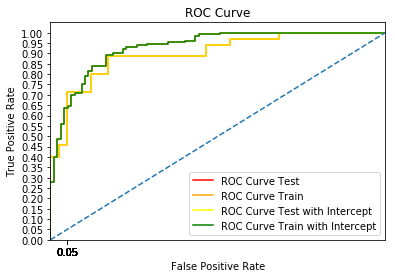

In [34]:
logreg2 = LogisticRegression(fit_intercept=True, C=1e16, solver='lbfgs')
logreg2.fit(X_train, y_train)

y_score2 = logreg.decision_function(X_test)
y_score2_train = logreg.decision_function(X_train)

fpr2, tpr2, threshold2 = roc_curve(y_test, y_score2)
fpr2_train, tpr2_train, threshold2_train = roc_curve(y_train, y_score2_train)

plt.plot(fpr_test, tpr_test, label='ROC Curve Test', color='red')
plt.plot(fpr_train, tpr_train, label='ROC Curve Train', color='orange')
plt.plot(fpr2, tpr2, label='ROC Curve Test with Intercept', color='yellow')
plt.plot(fpr2_train, tpr2_train, label='ROC Curve Train with Intercept', color='green')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([1/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

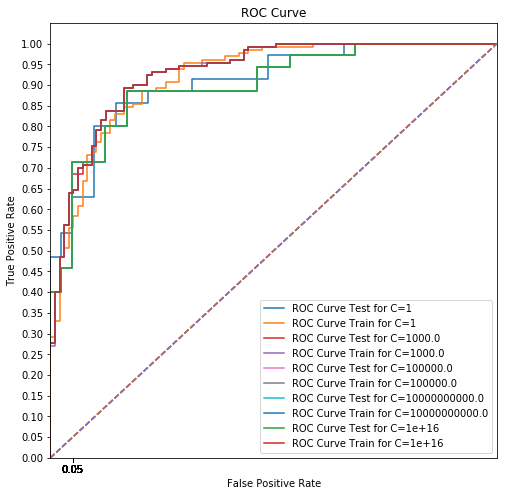

In [36]:
C_params = [1, 1e3, 1e5, 1e10, 1e16]
plt.figure(figsize=(8,8))
for c in C_params:
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='lbfgs')
    logreg.fit(X_train, y_train)

    y_score_test = logreg.decision_function(X_test)
    y_score_train = logreg.decision_function(X_train)
    
    fpr_te, tpr_te, threshold = roc_curve(y_test, y_score_test)
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_score_train)
    
    plt.plot(fpr_te, tpr_te, label='ROC Curve Test for C={}'.format(c))
    plt.plot(fpr_train, tpr_train, label='ROC Curve Train for C={}'.format(c))
    plt.plot([0,1],[0,1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([1/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

plt.show()


## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

As the C parameter increases, we reduce regularization. As such, we see (slightly) larger differences in the AUC score between the test and train set demonstrating potentially (mild) overfitting when we remove regularization.

## Summary

In this lesson, we reviewed many of the accuracy measures of classification algorithms and observed the impact of additional tuning parameters such as regularization.